In [10]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image
from resizeimage import resizeimage


In [11]:
def createImage(kernel,image,channel,color):
    
    #File for Predicted Probabilities
    file_path=image+channel+kernel+'PDProb.npy'
    
    #load Probabilities
    Q=np.load(file_path)
    R=1-Q[:,1]
    print(R.size)
    
    #Load Excel file with vessel location
    excel_path=image+'index.xlsx'
    indices=pd.read_excel(excel_path, header=None)
    print(indices.shape)
    
    #Create Blank Image
    Img=np.zeros((210,210))
    
    #Normalization
    #(b-a)*(X-Imagemin)/(Imagemax-Imagemin) +a
    #A is final max, B is final min
    #Imagemax is original max, Imagemin is original min
    #X is set

    Imagemin=np.amin(R)
    Imagemax=np.amax(R)
    Fmin=0
    Fmax=1
    New=(Fmax-Fmin)*(R-Imagemin)/(Imagemax-Imagemin) + Fmin
 
    #Fill in Probabilities
    for i in range (0,R.size):
        x,y=indices.iloc[i]
        Img[x,y]=New[i]

    #Create Image   
    plt.imshow(Img,cmap=color)
    plt.colorbar()
    
    
    #title='Priliminary'+' '+image+' '+channel+' '+kernel+' '+'Kernel'
    #plt.title(title)

    
    #Save Image
    root='C:\\Users\\Maximillian\\Desktop\\Code Demo\\Example\\Occulsion'
    save_path=os.path.join(root, channel)
    os.chdir(save_path)
    save_name=image+channel+kernel+'.png'
    plt.savefig(save_name)

4996
(4996, 2)


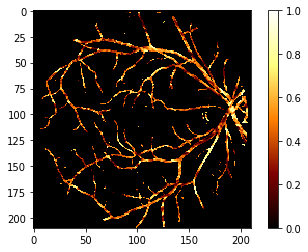

In [12]:
image='390'
kernel='Linear'
channel='Green'
color='afmhot'

path='C:\\Users\\Maximillian\\Desktop\\Code Demo\\Example\\Occulsion\\'+channel
os.chdir(path)

createImage(kernel,image,channel,color)